In [1]:
import pandas as pd
dataset = pd.read_csv('mushroom_cleaned.csv')
print(dataset.tail())

       cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
54030            73          5                3           2     0.887740   
54031            82          2                3           2     1.186164   
54032            82          5                3           2     0.915593   
54033            79          2                3           2     1.034963   
54034            72          5                3           2     1.158311   

       stem-width  stem-color    season  class  
54030         569          12  0.943195      1  
54031         490          12  0.943195      1  
54032         584          12  0.888450      1  
54033         491          12  0.888450      1  
54034         492          12  0.888450      1  


In [3]:
dataset.shape

(54035, 9)

In [4]:
X = dataset.drop('class', axis=1)
y = dataset['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X.shape

(54035, 8)

In [13]:
y.shape

(54035,)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve


Evaluating LogisticRegression model...
Confusion Matrix:
[[2854 2055]
 [1895 4003]]
Accuracy: 0.63
Precision (PPV): 0.66
Recall (Sensitivity): 0.68
Specificity: 0.58
NPV: 0.60
ROC AUC: 0.68


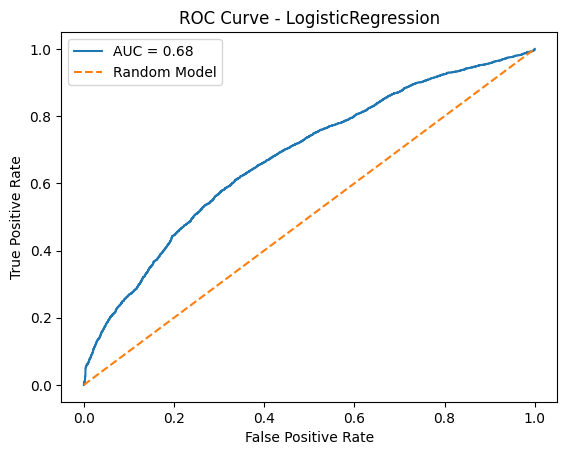

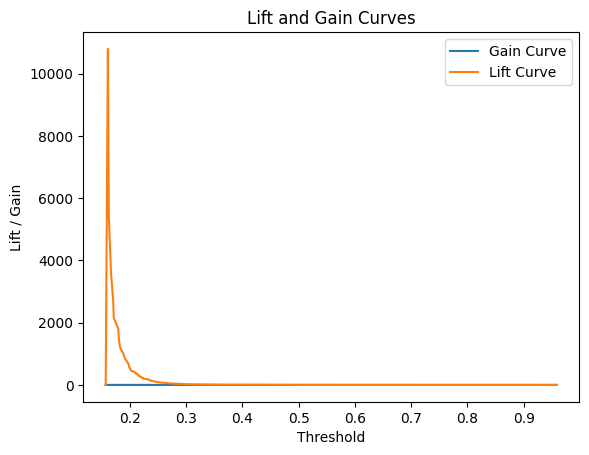


Evaluating RandomForestClassifier model...
Confusion Matrix:
[[4854   55]
 [  41 5857]]
Accuracy: 0.99
Precision (PPV): 0.99
Recall (Sensitivity): 0.99
Specificity: 0.99
NPV: 0.99
ROC AUC: 1.00


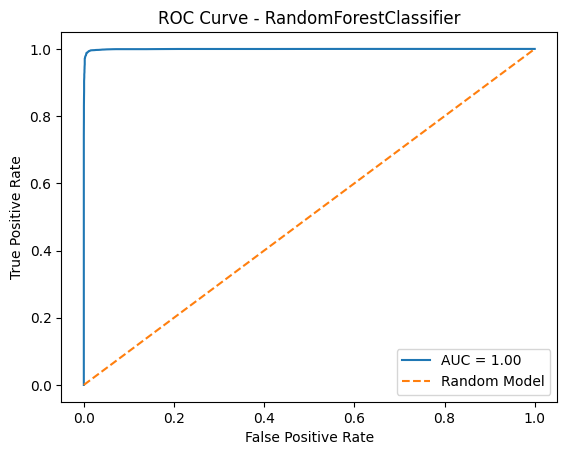

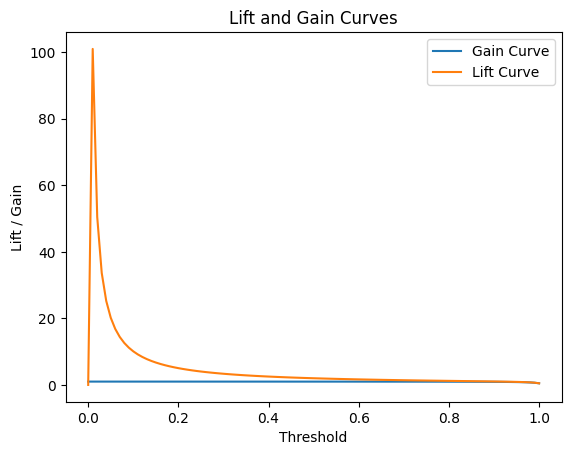


Evaluating DecisionTreeClassifier model...
Confusion Matrix:
[[4778  131]
 [ 101 5797]]
Accuracy: 0.98
Precision (PPV): 0.98
Recall (Sensitivity): 0.98
Specificity: 0.97
NPV: 0.98
ROC AUC: 0.98


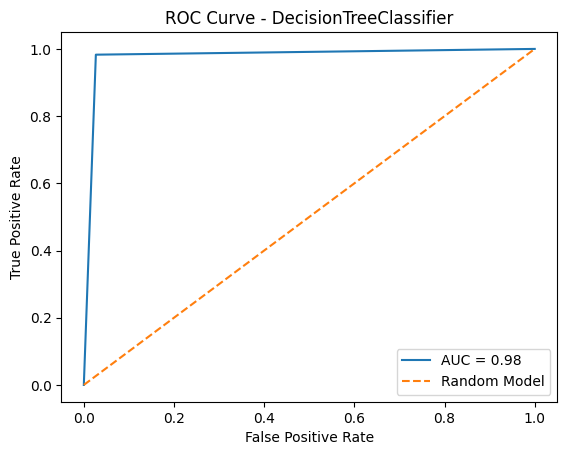

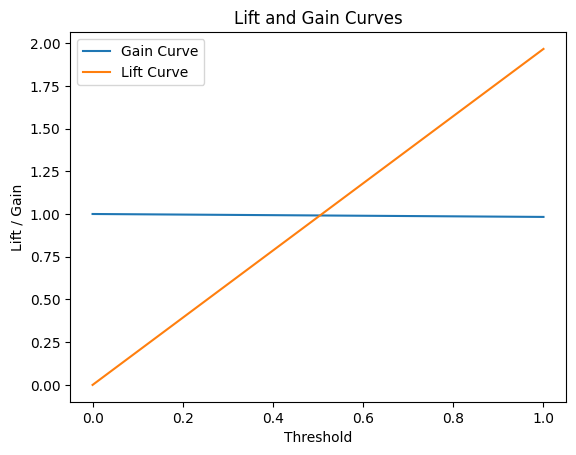

In [17]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    if len(y_prob) != len(y_test):
        print(f"Shape mismatch: y_prob has {len(y_prob)} elements and y_test has {len(y_test)} elements.")
        return

    if np.any(np.isnan(y_prob)) or np.any(np.isinf(y_prob)):
        print("Warning: y_prob contains NaN or infinite values!")
        return

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    precision = precision_score(y_test, y_pred)
    print(f"Precision (PPV): {precision:.2f}")

    recall = recall_score(y_test, y_pred)
    print(f"Recall (Sensitivity): {recall:.2f}")

    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    print(f"Specificity: {specificity:.2f}")

    npv = tn / (tn + fn)
    print(f"NPV: {npv:.2f}")

    fpr, tpr, _ = roc_curve(y_test, y_prob)

    if len(fpr) != len(tpr):
        print(f"ROC Curve: fpr and tpr have mismatched lengths. fpr: {len(fpr)}, tpr: {len(tpr)}")
        return

    roc_auc = auc(fpr, tpr)
    print(f"ROC AUC: {roc_auc:.2f}")

    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model.__class__.__name__}')
    plt.legend()
    plt.show()
    plot_lift_gain_curve(model, X_test, y_test)
    return accuracy, precision, recall, specificity, npv, roc_auc


def plot_lift_gain_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    gain = recall
    baseline = np.linspace(0, 1, len(gain))
    lift = np.divide(gain, baseline, out=np.zeros_like(gain), where=baseline != 0)
    plt.plot(thresholds, gain[:-1], label="Gain Curve")
    plt.plot(thresholds, lift[:-1], label="Lift Curve")
    plt.xlabel('Threshold')
    plt.ylabel('Lift / Gain')
    plt.title('Lift and Gain Curves')
    plt.legend()
    plt.show()

models = [lr_model, rf_model, dt_model]
for model in models:
    print(f"\nEvaluating {model.__class__.__name__} model...")
    evaluate_model(model, X_test, y_test)